In [1]:
import librosa

# Mel Spectrograms

Load the audio file

In [2]:
AUDIO_FILE = "audio.wav"
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

Plot it

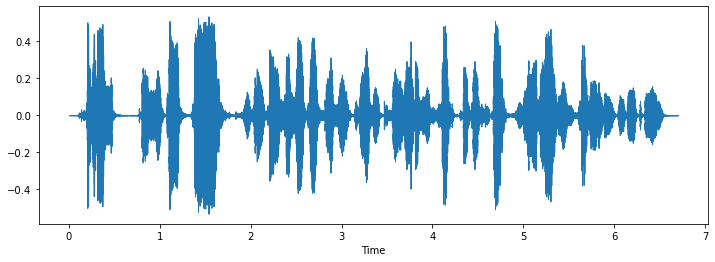

In [3]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.waveshow(samples, sr=sample_rate)

Using matplotlib: with sample number on the x-axis instead of seconds

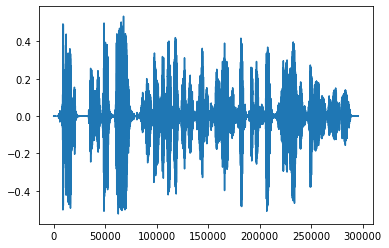

In [4]:
plt.plot(samples)

Play the audio

In [5]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [6]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (295516,) Sample rate  44100 Data type <class 'numpy.ndarray'>
[ 1.9836426e-03  1.7700195e-03  1.6174316e-03  1.4343262e-03
  1.3427734e-03  1.3122559e-03  1.2817383e-03  1.1901855e-03
  1.0070801e-03  7.6293945e-04  3.9672852e-04  9.1552734e-05
 -6.1035156e-05 -3.0517578e-05  1.2207031e-04  3.0517578e-04
  4.5776367e-04  3.9672852e-04  2.4414062e-04  6.1035156e-05]


## Spectrograms

C:\Users\ktkhu\AppData\Local\Temp/ipykernel_7832/2663500834.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram, y_axis='linear')


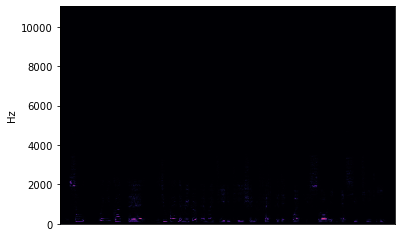

In [7]:
import numpy as np
sgram = librosa.stft(samples)
#s_db = librosa.amplitude_to_db(np.abs(sgram), ref=np.max)
librosa.display.specshow(sgram, y_axis='linear')

Use the Mel Scale in place of Frequency.

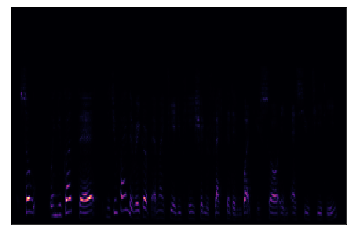

In [8]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

Use the Decibel Scale instead of Amplitude.

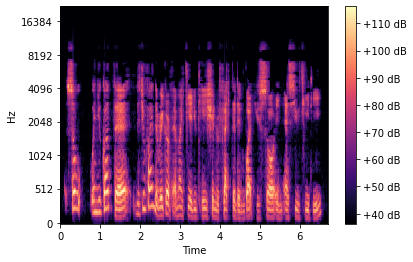

In [9]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# Sound Classification

## Prepare training data

Open an audio file; Return the signal as a tensor and the sample rate

In [25]:
def open_audio(audio_file):
    samples, sample_rate = librosa.load(audio_file, sr=None)
    return samples, sample_rate

Convert to two channels

In [24]:
def rechannel(audio, new_channel):
    sig, sr = audio
    
    if sig.shape[0] == new_channel:
        # Nothing to do
        return audio
    
    if new_channel == 1:
        # stereo to mono
        resig = sig[:1, :]
    else:
        # mono to stereo
        resig = np.tile(sig, (new_channel, 1))

Standardize sampling rate

In [ ]:
def resample(audio, new_sr):
    